In [1]:
# Team members and dataset
# Dataset : historical_emissions
# Luca Rougemont
# Jeyatheepan Jegatheeswaran DIA4
# George Shamieh, team member
# Rachid Ait Ameur, team

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.io as pio
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

In [3]:
# Fonction pour lire un fichier CSV
# Entrée : le chemin vers le fichier CSV
# Sortie : un DataFrame
def read_data(path):
    data = pd.read_csv(path)
    return data

In [4]:
data = read_data('historical_emissions.csv')

In [5]:
# Entrée : dataframe
# Sortie : toutes les informations sur le dataframe
def describe_data(df):
    print("First 5 Rows:")
    print(df.head())
    print("\n")
    print("\nData Info:")
    print(df.info())
    print("\n")
    print("\nData description:")
    print(df.describe())
    print("\n")
    print("\nShape of the data:")
    print(df.shape)
    print("\n")
    print("\nMissing value :")
    print(df.isnull().mean() * 100)
    print("\n")
    print("\nColumns :")
    print(df.dtypes)

In [6]:
describe_data(data)

First 5 Rows:
     ISO              Country    Data source                Sector      Gas  \
0  WORLD                World  Climate Watch  Total including LUCF  All GHG   
1    CHN                China  Climate Watch  Total including LUCF  All GHG   
2    USA        United States  Climate Watch  Total including LUCF  All GHG   
3    IND                India  Climate Watch  Total including LUCF  All GHG   
4    EUU  European Union (27)  Climate Watch  Total including LUCF  All GHG   

     Unit      2021      2020      2019      2018  ...      1999      1998  \
0  MtCO₂e  49553.48  47463.17  49843.57  49482.10  ...  35281.42  35278.92   
1  MtCO₂e  12791.58  12119.66  11953.60  11752.80  ...   3994.55   4061.45   
2  MtCO₂e   5564.83   5268.61   5798.48   5915.33  ...   6211.89   6211.39   
3  MtCO₂e   3419.89   3176.03   3385.58   3407.73  ...   1462.77   1384.94   
4  MtCO₂e   3140.23   2964.35   3239.82   3386.07  ...   3960.47   4034.79   

       1997      1996      1995      1994 

In [7]:
#Entrée : dataframe
#Sortie : dataframe sans valeur nulle
def drop_nan(df):
  df = df.dropna()
  return df

In [8]:
df = drop_nan(data)

In [9]:
describe_data(df)

First 5 Rows:
     ISO              Country    Data source                Sector      Gas  \
0  WORLD                World  Climate Watch  Total including LUCF  All GHG   
1    CHN                China  Climate Watch  Total including LUCF  All GHG   
2    USA        United States  Climate Watch  Total including LUCF  All GHG   
3    IND                India  Climate Watch  Total including LUCF  All GHG   
4    EUU  European Union (27)  Climate Watch  Total including LUCF  All GHG   

     Unit      2021      2020      2019      2018  ...      1999      1998  \
0  MtCO₂e  49553.48  47463.17  49843.57  49482.10  ...  35281.42  35278.92   
1  MtCO₂e  12791.58  12119.66  11953.60  11752.80  ...   3994.55   4061.45   
2  MtCO₂e   5564.83   5268.61   5798.48   5915.33  ...   6211.89   6211.39   
3  MtCO₂e   3419.89   3176.03   3385.58   3407.73  ...   1462.77   1384.94   
4  MtCO₂e   3140.23   2964.35   3239.82   3386.07  ...   3960.47   4034.79   

       1997      1996      1995      1994 

In [10]:
#Fonction pour calculer la part des émissions de chaque pays dans l'émission globale. La ligne "WORLD" est utilisée comme référence pour les émissions globales.
def part_emissions_par_pays(df):

    # Vérifier si la ligne "WORLD" existe
    if 'World' not in df['Country'].values:
        raise ValueError("La ligne 'WORLD' est introuvable dans la colonne 'Country'.")

    # Filtrer les données pour obtenir les émissions mondiales
    world_emissions = df[df['Country'] == 'World'].iloc[0, 6:]

    # Calculer la part de chaque pays par rapport aux émissions mondiales
    for year in world_emissions.index:
        df[f'Part_{year}'] = (df[year].astype(float) / world_emissions[year].astype(float)) * 100

    # Remplacer les NaN par 0 (pour les pays sans données d'émission pour une année donnée)
    df.fillna(0, inplace=True)

    return df

In [11]:
df = part_emissions_par_pays(df)

/var/folders/2j/l06v7zfn3gg9wy_btrp9cwf40000gn/T/ipykernel_22134/3643728451.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Part_{year}'] = (df[year].astype(float) / world_emissions[year].astype(float)) * 100
/var/folders/2j/l06v7zfn3gg9wy_btrp9cwf40000gn/T/ipykernel_22134/3643728451.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Part_{year}'] = (df[year].astype(float) / world_emissions[year].astype(float)) * 100
/var/folders/2j/l06v7zfn3gg9wy_btrp9cwf40000gn/T/ipykernel_22134/364372845

In [12]:
#Cette fonction crée un diagramme circulaire montrant la répartition des émissions de CO2 par pays pour une année donnée.
def pie_chart_emissions(df, year):

    # Filtrer les données pour exclure la ligne "WORLD"
    filtered_df = df[df['Country'] != 'World']

    # Obtenir les parts d'émissions pour l'année spécifiée
    parts = filtered_df[f'Part_{year}']
    countries = filtered_df['Country']

    # Remplacer les valeurs négatives ou non définies par 0
    parts = parts.clip(lower=0)

    # Limiter à un top 10 pour une meilleure lisibilité
    top_10 = parts.nlargest(10)
    other = max(0, 100 - top_10.sum())

    # Préparer les données pour le graphique
    labels = list(filtered_df.loc[top_10.index, 'Country']) + ["Autres"]
    sizes = list(top_10) + [other]

    # Ajouter les indices aux noms des pays
    labels = [f"{i + 1}. {country}" for i, country in enumerate(labels)]

    # Créer le pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f"Répartition des émissions de CO2 par pays en {year}")
    plt.axis('equal')  # Assure que le diagramme est circulaire
    plt.show()

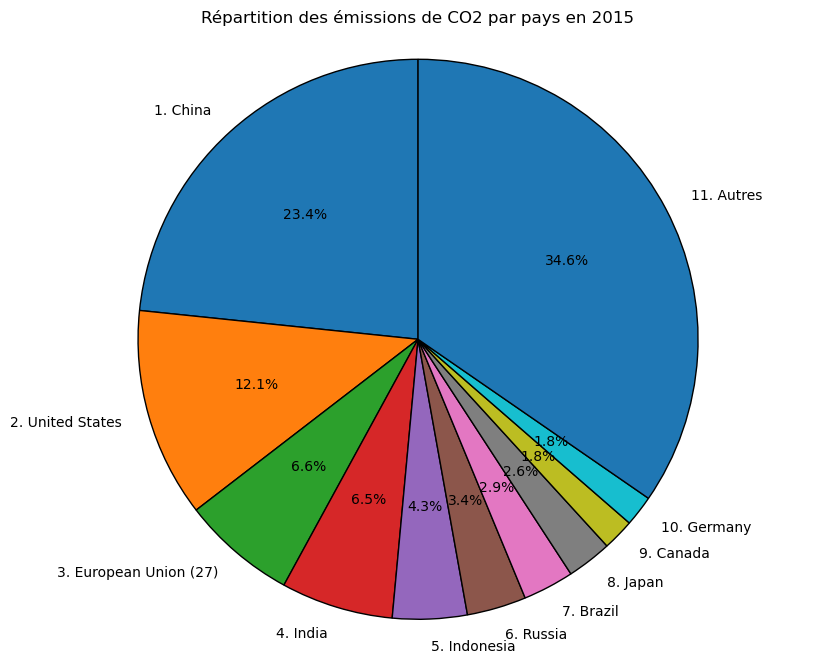

In [13]:
part_chart = pie_chart_emissions(df, 2015)

Cet indicateur nous montre la contribution de chaque pays aux émissions mondiales de CO₂ pour une année donnée. Grâce à cette mesure, nous avons pu identifier les plus grands contributeurs aux émissions mondiales, tels que la Chine, les États-Unis et l'Inde. Ces pays représentent une part importante des émissions globales, ce qui met en évidence leur rôle crucial dans la lutte contre le changement climatique.

In [14]:
#Cette fonction calcule les scores Z pour les émissions de chaque pays par année et identifie les anomalies (valeurs avec un score Z supérieur à 2 en valeur absolue).
def calculer_iaeg(dataframe):
    years = [col for col in dataframe.columns if col.isdigit()]
    df_years = dataframe[['Country'] + years].set_index('Country')

    df_z_scores = df_years.apply(
        lambda row: (row - row.mean()) / row.std(ddof=0),
        axis=1
    )

    df_z_scores.reset_index(inplace=True)

    anomaly_columns = [f"{year}_anomaly" for year in years]
    for year, anomaly_col in zip(years, anomaly_columns):
        df_z_scores[anomaly_col] = df_z_scores[year].apply(lambda x: 'Anomalie' if abs(x) > 2 else 'Normal')

    return df_z_scores

In [15]:
resultat = calculer_iaeg(df)

In [16]:
#Cette fonction affiche une carte thermique des anomalies des émissions de GES (IAEG) par pays et par année, en utilisant les scores Z.
def afficher_heatmap_iaeg(resultat):
    cols_to_plot = [col for col in resultat.columns if col.isdigit()]

    heatmap_data = resultat.set_index('Country')[cols_to_plot]

    plt.figure(figsize=(15, 8))
    sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        annot=False,
        cbar_kws={'label': 'Score-Z'}
    )
    plt.title("Carte des anomalies des émissions de GES (IAEG)")
    plt.xlabel("Année")
    plt.ylabel("Pays")
    plt.show()

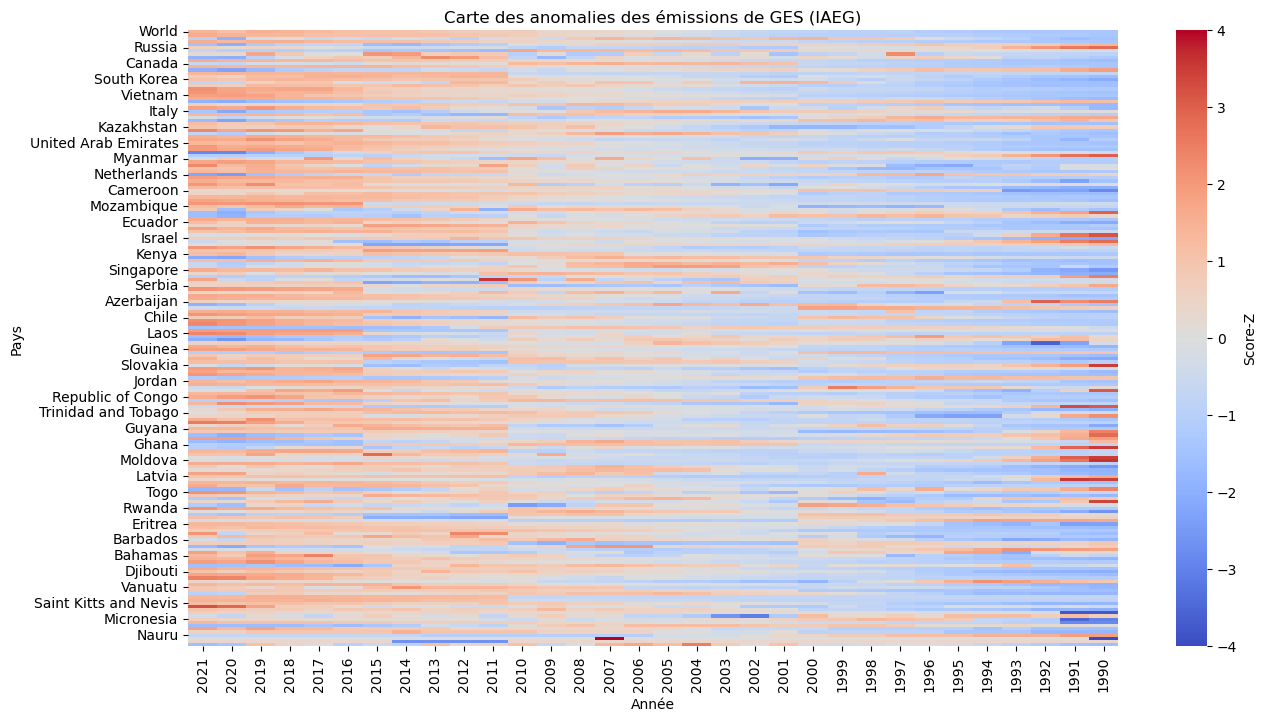

In [17]:
afficher_heatmap_iaeg(resultat)

Le deuxième indicateur évalue les anomalies dans les émissions de CO₂ pour chaque pays en comparant leurs émissions annuelles à leur historique. En utilisant la méthode du Z-Score, nous avons pu détecter des années où les émissions d'un pays étaient anormalement élevées ou basses. Cet indicateur est essentiel pour repérer des événements exceptionnels, tels que des crises économiques ou des changements drastiques de politiques environnementales.

In [18]:
from sklearn.cluster import KMeans

In [19]:
#Visualiser le plot du clustering par pays
def visualize_country_clustering_with_plot(dataframe, start_year, end_year, n_clusters=6, random_state=0):

    years = [str(year) for year in range(int(start_year), int(end_year) + 1)]
    for year in years:
        if year not in dataframe.columns:
            raise ValueError(f"Colonne '{year}' absente du DataFrame.")

    # Filtrer pour exclure "World"
    dataframe = dataframe[dataframe["Country"] != "World"].copy()

    # Calcul des moyennes pour les années spécifiées
    dataframe["Mean_Emissions"] = dataframe[years].mean(axis=1)

    # Préparation des données pour le clustering
    data_for_clustering = dataframe[["Country", "Mean_Emissions"]].dropna()

    # Vérification que les données sont valides
    if data_for_clustering.empty:
        raise ValueError("Les données pour le clustering sont vides. Vérifiez les colonnes et les valeurs.")

    # Appliquer K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    data_for_clustering["Cluster"] = kmeans.fit_predict(data_for_clustering[["Mean_Emissions"]])

    # Trier les pays dans chaque cluster par émissions moyennes décroissantes
    data_for_clustering.sort_values(by=["Cluster", "Mean_Emissions"], ascending=[True, False], inplace=True)

    # Visualisation
    cluster_summary = {}
    plt.figure(figsize=(12, 8))

    for cluster in range(n_clusters):
        cluster_countries = data_for_clustering[data_for_clustering["Cluster"] == cluster]["Country"].tolist()
        cluster_summary[cluster] = cluster_countries

        # Texte pour le cluster
        cluster_size = len(cluster_countries)
        print(f"\nCluster {cluster} (Nombre de pays : {cluster_size}):")
        print(", ".join(cluster_countries))

        # Préparation des données pour la visualisation
        emissions = data_for_clustering[data_for_clustering["Cluster"] == cluster]["Mean_Emissions"]

        # Ajouter un graphique pour chaque cluster
        plt.barh(
            cluster_countries[:20],  # Limiter l'affichage à 20 pays max pour éviter un graphique surchargé
            emissions[:20],
            label=f"Cluster {cluster} ({cluster_size} pays)"
        )

    # Mise en forme du graphique
    plt.title(f"Clustering des pays ({start_year}-{end_year}) selon les émissions moyennes", fontsize=16)
    plt.xlabel("Émissions Moyennes (MtCO₂e)", fontsize=12)
    plt.ylabel("Pays", fontsize=12)
    plt.legend(title="Clusters")
    plt.tight_layout()
    plt.show()

    return data_for_clustering


Cluster 0 (Nombre de pays : 186):
Japan, Iran, Germany, Canada, Saudi Arabia, Democratic Republic of the Congo, Mexico, South Korea, Australia, South Africa, United Kingdom, Türkiye, Thailand, Pakistan, Argentina, Vietnam, Italy, Nigeria, France, Venezuela, Poland, Malaysia, Egypt, Spain, Kazakhstan, Colombia, Algeria, United Arab Emirates, Iraq, Ukraine, Bangladesh, Philippines, Myanmar, Turkmenistan, Peru, Ethiopia, Netherlands, Uzbekistan, Tanzania, Kuwait, Angola, Bolivia, Sudan, Cameroon, Qatar, Czech Republic, Mozambique, Chad, Belgium, Zimbabwe, Paraguay, Oman, Ecuador, Zambia, Libya, Belarus, Israel, Morocco, North Korea, Greece, Cambodia, Mongolia, New Zealand, Ireland, Kenya, Austria, South Sudan, Singapore, Portugal, Hungary, Serbia, Finland, Central African Republic, Botswana, Burkina Faso, Uganda, Papua New Guinea, Bahrain, Azerbaijan, Côte d'Ivoire, Denmark, Chile, Nepal, Syria, Switzerland, Romania, Somalia, Mali, Niger, Madagascar, Laos, Tunisia, Guinea, Dominican Repu

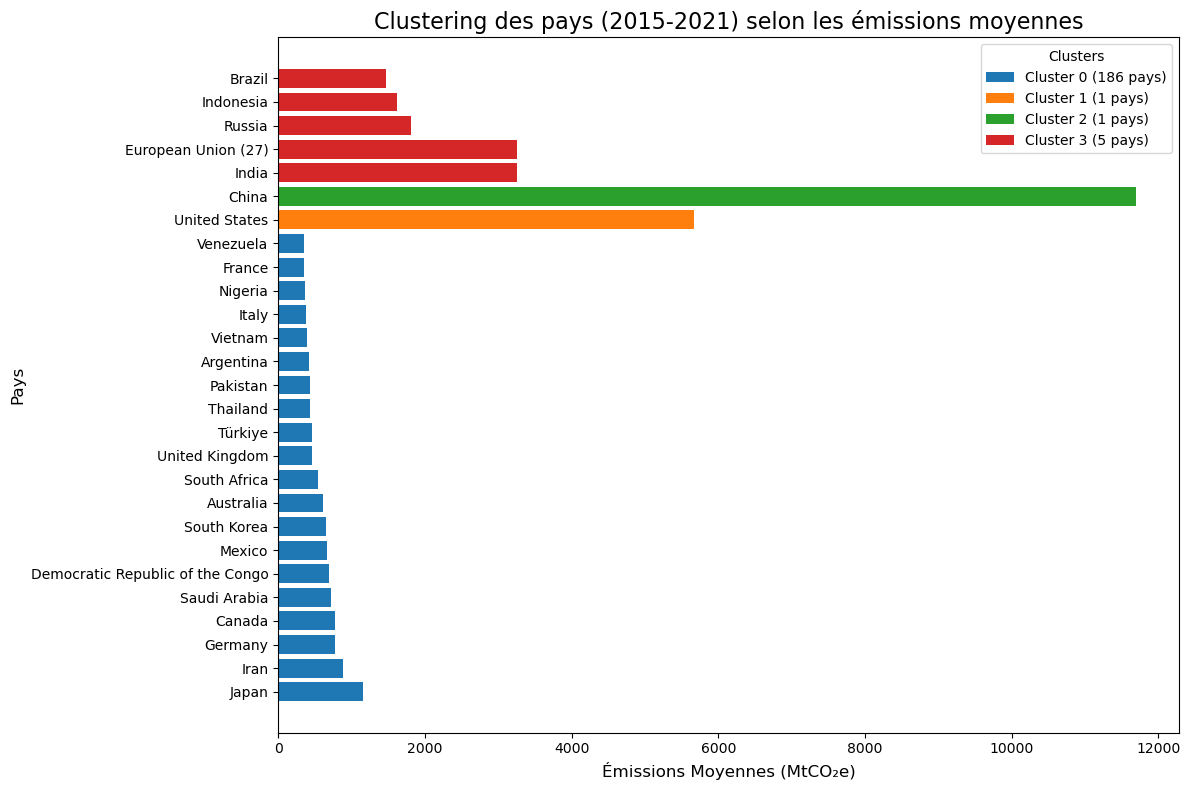

In [20]:
result = visualize_country_clustering_with_plot(df, "2015", "2021", n_clusters=4)

Le troisième indicateur regroupe les pays en quatre clusters en fonction de leur profil d’émissions de CO₂, calculé à partir de leurs émissions moyennes sur plusieurs années. Ces clusters permettent de différencier les grands pollueurs, les émetteurs moyens, et les faibles contributeurs. Ce type d’analyse aide à cibler des actions spécifiques pour chaque groupe de pays afin d’optimiser les efforts globaux de réduction des émissions.

In [21]:
from prophet import Prophet

In [22]:
#Fonction qui prédit et affiche les données réelles vs les données prédites d'émissions de CO2 mondiale
def predict_and_plot_world_pollution(df, years_to_predict=5):

    # Filtrer les données pour "World"
    if "World" not in df["Country"].values:
        raise ValueError("Le pays 'World' n'est pas présent dans le DataFrame.")

    # Extraire les colonnes correspondant aux années de 1990 à 2021
    years_columns = [str(year) for year in range(1990, 2022)]
    world_data = df[df["Country"] == "World"][years_columns].T  # Transposer les colonnes d'années
    world_data = world_data.reset_index()
    world_data.columns = ["Year", "Pollution"]
    world_data["Year"] = pd.to_datetime(world_data["Year"], format="%Y")

    # Préparer les données pour Prophet
    prophet_data = world_data.rename(columns={"Year": "ds", "Pollution": "y"})

    # Initialiser et entraîner Prophet
    model = Prophet()
    model.fit(prophet_data)

    # Générer les dates futures
    future = model.make_future_dataframe(periods=years_to_predict, freq="Y")
    forecast = model.predict(future)

    # Graphique avec les données réelles et les prédictions
    plt.figure(figsize=(12, 6))
    plt.plot(world_data["Year"], world_data["Pollution"], label="Données réelles", marker="o")
    plt.plot(forecast["ds"], forecast["yhat"], label="Prédictions Prophet", linestyle="--", color="orange")
    plt.fill_between(
        forecast["ds"],
        forecast["yhat_lower"],
        forecast["yhat_upper"],
        color="gray", alpha=0.2, label="Intervalle de confiance"
    )
    plt.title("Prédictions de la pollution mondiale avec Prophet", fontsize=16)
    plt.xlabel("Année", fontsize=12)
    plt.ylabel("Pollution (MtCO₂e)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    return forecast

16:39:31 - cmdstanpy - INFO - Chain [1] start processing
16:39:31 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


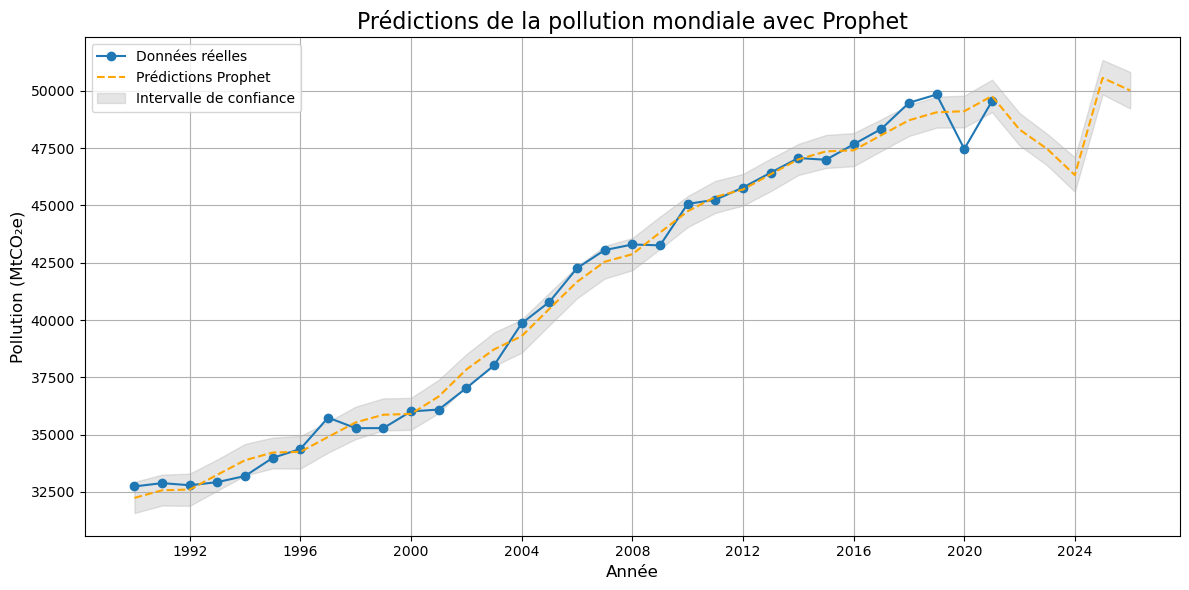

In [23]:
forecast_df = predict_and_plot_world_pollution(df, years_to_predict=5)

Le dernier indicateur utilise une approche de prédiction temporelle pour analyser l’évolution des émissions mondiales de CO₂ au fil du temps. En comparant les émissions réelles avec les prévisions, nous avons remarqué une forte baisse des émissions pendant la période de la pandémie de COVID-19 autour de 2020, mettant en évidence l’impact de cette crise mondiale sur l’activité humaine et les émissions associées. Cet indicateur est crucial pour anticiper les tendances futures et évaluer les effets des politiques climatiques.

In [24]:
def pie_chart_emissions(df, year):
    filtered_df = df[df['Country'] != 'World']
    parts = filtered_df[f'Part_{year}']
    countries = filtered_df['Country']
    parts = parts.clip(lower=0)
    top_10 = parts.nlargest(10)
    other = max(0, 100 - top_10.sum())

    labels = list(filtered_df.loc[top_10.index, 'Country']) + ["Autres"]
    sizes = list(top_10) + [other]
    labels = [f"{i + 1}. {country}" for i, country in enumerate(labels)]

    fig_pie = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.3)])
    fig_pie.update_layout(title=f"Répartition des émissions de CO2 par pays en {year}", showlegend=True)
    return fig_pie

In [25]:
def create_heatmap(resultat):
    cols_to_plot = [col for col in resultat.columns if col.isdigit()]
    heatmap_data = resultat.set_index('Country')[cols_to_plot]

    fig_heatmap = go.Figure(data=go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='Viridis'
    ))
    fig_heatmap.update_layout(title="Carte des anomalies des émissions de GES (IAEG)",
                              xaxis_title="Année",
                              yaxis_title="Pays")
    return fig_heatmap

In [26]:
def create_clustering_graph(df):
    years = [str(year) for year in range(2015, 2022)]
    dataframe = df[df["Country"] != "World"].copy()
    dataframe["Mean_Emissions"] = dataframe[years].mean(axis=1)

    kmeans = KMeans(n_clusters=4, random_state=0)
    dataframe["Cluster"] = kmeans.fit_predict(dataframe[["Mean_Emissions"]])

    fig_cluster = go.Figure()
    for cluster in range(4):
        cluster_data = dataframe[dataframe["Cluster"] == cluster]
        fig_cluster.add_trace(go.Bar(
            y=cluster_data["Country"],
            x=cluster_data["Mean_Emissions"],
            name=f"Cluster {cluster}",
            orientation="h"
        ))
    fig_cluster.update_layout(title="Clustering des pays selon les émissions moyennes",
                              xaxis_title="Émissions Moyennes",
                              yaxis_title="Pays")
    return fig_cluster

In [27]:
def predict_and_plot_world_pollution(df, years_to_predict=5):
    if "World" not in df["Country"].values:
        raise ValueError("Le pays 'World' n'est pas présent dans le DataFrame.")

    years_columns = [str(year) for year in range(1990, 2022)]
    world_data = df[df["Country"] == "World"][years_columns].T
    world_data = world_data.reset_index()
    world_data.columns = ["Year", "Pollution"]
    world_data["Year"] = pd.to_datetime(world_data["Year"], format="%Y")

    prophet_data = world_data.rename(columns={"Year": "ds", "Pollution": "y"})
    model = Prophet()
    model.fit(prophet_data)
    future = model.make_future_dataframe(periods=years_to_predict, freq="Y")
    forecast = model.predict(future)

    fig_forecast = go.Figure()
    fig_forecast.add_trace(go.Scatter(x=world_data["Year"], y=world_data["Pollution"],
                                      mode='lines+markers', name='Données réelles'))
    fig_forecast.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat"],
                                      mode='lines', name='Prédictions'))
    fig_forecast.update_layout(title="Prédictions de la pollution mondiale avec Prophet",
                               xaxis_title="Année",
                               yaxis_title="Pollution (MtCO₂e)")
    return fig_forecast

In [28]:
app = Dash(__name__)

In [29]:
app.layout = html.Div([
    html.H1("Dashboard des Émissions de CO2 Luca Rougemont - George Shamieh - Rachid Ait Ameur - Jeyatheepan Jegatheeswaran - Projet 5", style={'textAlign': 'center', 'color': 'blue'}),

    html.Div([
        html.H3("Répartition des émissions par pays (2015)"),
        dcc.Graph(id='pie-chart', figure=pie_chart_emissions(df, 2015))
    ], style={'padding': '20px'}),

    html.Div([
        html.H3("Carte des anomalies des émissions (IAEG)"),
        dcc.Graph(id='heatmap', figure=create_heatmap(resultat))
    ], style={'padding': '20px'}),

    html.Div([
        html.H3("Clustering des pays (2015-2021)"),
        dcc.Graph(id='clustering-graph', figure=create_clustering_graph(df))
    ], style={'padding': '20px'}),

    html.Div([
        html.H3("Prédictions des émissions mondiales"),
        dcc.Graph(id='prediction-graph', figure=predict_and_plot_world_pollution(df))
    ], style={'padding': '20px'})
])

16:39:32 - cmdstanpy - INFO - Chain [1] start processing
16:39:32 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [30]:
if __name__ == '__main__':
    app.run_server(debug=True)